# Retrieval tool examples over Munich test sites

In this examples we will perform some retrievals over a wheat field and a triticale field near Munich. We have a lot of field data to use as validation at these sites collected by LMU. Below we show the NDVI of these sites at the end of June in 2017. 

![NDVI_Munich_wheat_triticale](munich_ndvi.png)

The black stars show points where field observations of Leaf Area Index (LAI), soil moisture and canopy height were collected. In the examples shown here we will run the retrieval over a short time period in the interests of time and then show some precomputed output for a whole season. To start with we run the retrieval tool using the JULES prior for May/June over field 508 growing wheat.

In [1]:
import run_retrieval as rrn
reload(rrn)
rrn.run_retrieval_tool(site='508_med', out_dir='retrieval_tool_examples/mni_508_pri', date_start='20170527', date_end='20170603', prior=True)

{'ctlvec_relunc': [0.01, 0.5, 0.05, 0.5],
 'ctlvec_uncfloor': [0.001, 3.0, 0.1, 0.05],
 'dynmodunc_inifile': '/home/users/if910917/projects/esa_demo/data/dynmod/dynmod.ini',
 'gtol': 1.0,
 'no_use_prior': False,
 'obs_s1': '../../data/s1_obs/mni_s1_508_med_hv.csv',
 'obs_s2': '../../data/s2_obs/mni_s2_508_med_b4b5b6b7b8b8a.csv',
 's1_unc': 1.6,
 's1_vh_uncfloor': 1e-05,
 's1_vv_uncfloor': 0.004,
 's2_relunc': 0.05,
 's2_uncfloor': 0.02,
 'site_nml': '/home/users/if910917/projects/esa_demo/site.nml',
 'states_file': '../../data/field_obs/retr_jules_prior.csv',
 'time_end': '20170603',
 'time_start': '20170527'}

The retrieval tool aims to minimise the value of the cost function:
![Retrieval tool cost function](cost_fn.png)

plot_ret.py:47: MatplotlibDeprecationWarning: The csv2rec function was deprecated in version 2.2.
  field_laican = mlab.csv2rec('data/field_obs/mni_lai_canht_field_'+ point + '.csv', comments='%')
plot_ret.py:48: MatplotlibDeprecationWarning: The csv2rec function was deprecated in version 2.2.
  field_sm = mlab.csv2rec('data/field_obs/mni_sm_field_' + point + '.csv', comments='%')


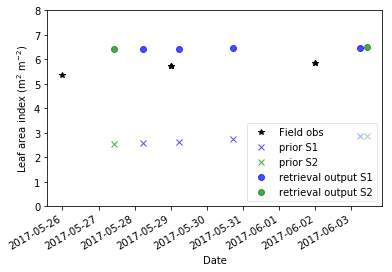

In [2]:
import plot_ret as pr
reload(pr)
import matplotlib.pyplot as plt
%matplotlib inline
pr.plot_var('lai', 'retrieval_tool_examples/mni_508_pri')
plt.show()

Next we run the retrieval tool for the start of the season (March/April) over field 542 growing triticale. Here we do not use the JULES prior in the retrieval. In this case where no prior information is provided the retrieval tool assumes a contant land surface state of LAI=1.5, soil moisture=0.3 and canopy height=1.5 for the prior estimates used within the retrieval algorithm 

In [3]:
rrn.run_retrieval_tool(site='542_high', out_dir='retrieval_tool_examples/mni_542_nopri', date_start='20170324', date_end='20170405', prior=False)

{'ctlvec_relunc': [0.01, 0.5, 0.05, 0.5],
 'ctlvec_uncfloor': [0.001, 3.0, 0.1, 0.05],
 'dynmodunc_inifile': '/home/users/if910917/projects/esa_demo/data/dynmod/dynmod.ini',
 'gtol': 1.0,
 'no_use_prior': False,
 'obs_s1': '../../data/s1_obs/mni_s1_542_high_hv.csv',
 'obs_s2': '../../data/s2_obs/mni_s2_542_high_b4b5b6b7b8b8a.csv',
 's1_unc': 1.6,
 's1_vh_uncfloor': 1e-05,
 's1_vv_uncfloor': 0.004,
 's2_relunc': 0.05,
 's2_uncfloor': 0.02,
 'site_nml': '/home/users/if910917/projects/esa_demo/site.nml',
 'states_file': False,
 'time_end': '20170405',
 'time_start': '20170324'}

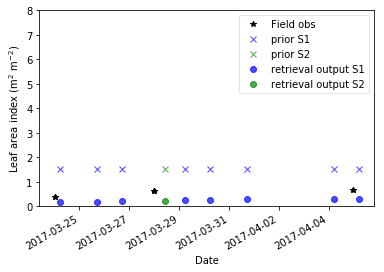

In [4]:
pr.plot_var('lai', 'retrieval_tool_examples/mni_542_nopri', point='542_high')
plt.show()

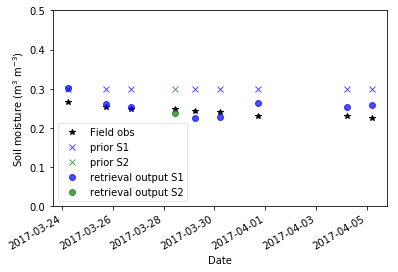

In [5]:
pr.plot_var('sm', 'retrieval_tool_examples/mni_542_20170324_20170405_nopri', point='542_high')
plt.show()

# Pre-computed examples

In the interests of time we have run some pre-computed examples for the whole season for field 542 and 508. First we show field 542 LAI and soil moisture, here we have used JULES as a prior in the retrieval algorithm. 

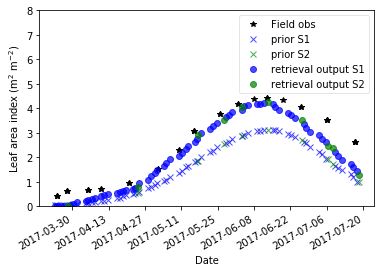

In [6]:
pr.plot_var('lai', 'retrieval_tool_examples/mni_542_season_pri', point='542_high')
plt.show()

## Using S1 only, S2 only and S1 + S2

In this section we show results from the retrieval tool using different combinations of sensors. These retrievals do not use the JULES prior and instead just use a flat estimate to the targets variables.

## S1 only

plot_ret.py:102: MatplotlibDeprecationWarning: The csv2rec function was deprecated in version 2.2.
  point+'.csv', comments='%')
plot_ret.py:104: MatplotlibDeprecationWarning: The csv2rec function was deprecated in version 2.2.
  comments='%')


correlation: -0.6747339465118409
rmse: 2.9743781843735935


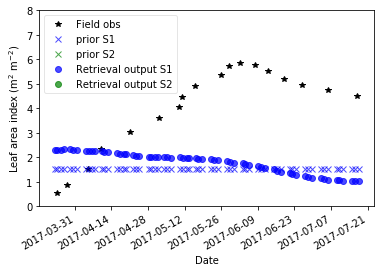

In [7]:
pr.plot_var_season('lai', 'retrieval_tool_examples/mni_508_season_s1/', point='508_med')
plt.show()


correlation: 0.17624205362283968
rmse: 0.07221549321882503


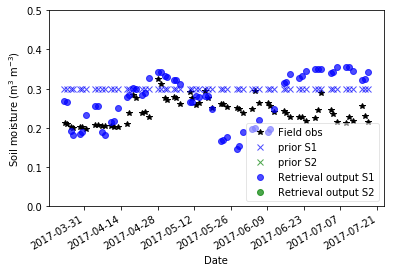

In [8]:
pr.plot_var_season('sm', 'retrieval_tool_examples/mni_508_season_s1/', point='508_med')
plt.show()

## S2 only

correlation: 0.7982384605590682
rmse: 1.1958338907781205


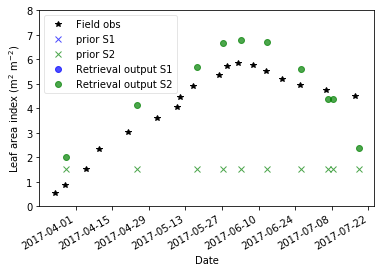

In [9]:
pr.plot_var_season('lai', 'retrieval_tool_examples/mni_508_season_s2/', point='508_med')
plt.show()

correlation: 0.1767907072226939
rmse: 0.04582171637433771


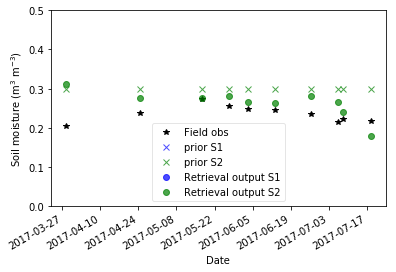

In [10]:
pr.plot_var_season('sm', 'retrieval_tool_examples/mni_508_season_s2/', point='508_med')
plt.show()

## S1 + S2

correlation: 0.9494387448445013
rmse: 0.6883832632838873


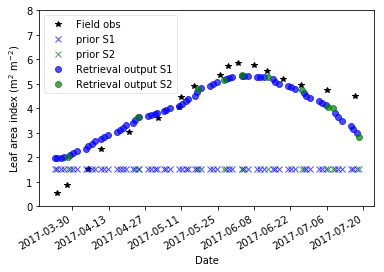

In [11]:
pr.plot_var_season('lai', 'retrieval_tool_examples/mni_508_season/', point='508_med')
plt.show()

correlation: 0.6887398207088249
rmse: 0.08543601020078535


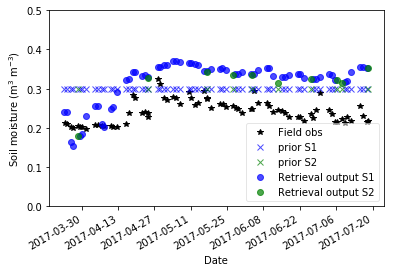

In [12]:
pr.plot_var_season('sm', 'retrieval_tool_examples/mni_508_season/', point='508_med')
plt.show()

We see that best results are achieved by using both S1 and S2 in the retrieval of LAI and soil moisture. Sentinel 2 provides strong constraint on leaf area index, allowing us to gain more information from Sentinel 1 about soil moisture. We also have the added benefit of a higher temporal resolution for our retrieval.